In [ ]:
'''1. Calculate covariance(Age, Strength) and correlation(Age, strength) for following data
using
a. Pearson’s Correlation coefficient method
b. Spearman’s rank correlation method
(use scipy.stats.pearsonr and scipy.stats.spearmanr functions)
Age 38 62 22 38 45 69 75 38 80 32 51 56 21 34 76
Strength 20 15 30 21 18 12 14 28 09 22 20 19 28 23 14'''
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Data
age = np.array([38, 62, 22, 38, 45, 69, 75, 38, 80, 32, 51, 56, 21, 34, 76])
strength = np.array([20, 15, 30, 21, 18, 12, 14, 28, 9, 22, 20, 19, 28, 23, 14])

# Covariance
covariance = np.cov(age, strength)[0, 1]
print("Covariance between Age and Strength:", covariance)

# Pearson's correlation coefficient
pearson_corr, _ = pearsonr(age, strength)
print("Pearson's correlation coefficient:", pearson_corr)

# Spearman's rank correlation coefficient
spearman_corr, _ = spearmanr(age, strength)
print("Spearman's correlation coefficient:", spearman_corr)

Covariance between Age and Strength: -111.0047619047619
Pearson's correlation coefficient: -0.9228734519431103
Spearman's correlation coefficient: -0.9362088235211781


In [ ]:
''' 2. Load the california_housing dataset from scikitlearn. Find the correlation between each
of the features using pearson’s method and spearman’s method. Draw the heatmap for
both cases. Identify if any redundant features are there and which independent features
are highly correlated with dependent feature. Use following lines of code to import the
dataset from sklearn and then create the dataframe from it:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()'''
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)
california_housing.frame.head()

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Find the correlation between each of the features using pearson’s method and spearman’s method.
import pandas as pd

df = pd.DataFrame(california_housing.frame)

pearson_corr = df.corr(method='pearson')

spearman_corr = df.corr(method='spearman')

print("Pearson correlation matrix:\n")
pearson_corr


Pearson correlation matrix:



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


from matplotlib import pyplot as plt
pearson_corr['MedInc'].plot(kind='hist', bins=20, title='MedInc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pearson_corr['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pearson_corr['AveRooms'].plot(kind='hist', bins=20, title='AveRooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pearson_corr['AveBedrms'].plot(kind='hist', bins=20, title='AveBedrms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pearson_corr.plot(kind='scatter', x='MedInc', y='HouseAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pearson_corr.plot(kind='scatter', x='HouseAge', y='AveRooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pearson_corr.plot(kind='scatter', x='AveRooms', y='AveBedrms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pearson_corr.plot(kind='scatter', x='AveBedrms', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pearson_corr['MedInc'].plot(kind='line', figsize=(8, 4), title='MedInc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pearson_corr['HouseAge'].plot(kind='line', figsize=(8, 4), title='HouseAge')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pearson_corr['AveRooms'].plot(kind='line', figsize=(8, 4), title='AveRooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pearson_corr['AveBedrms'].plot(kind='line', figsize=(8, 4), title='AveBedrms')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

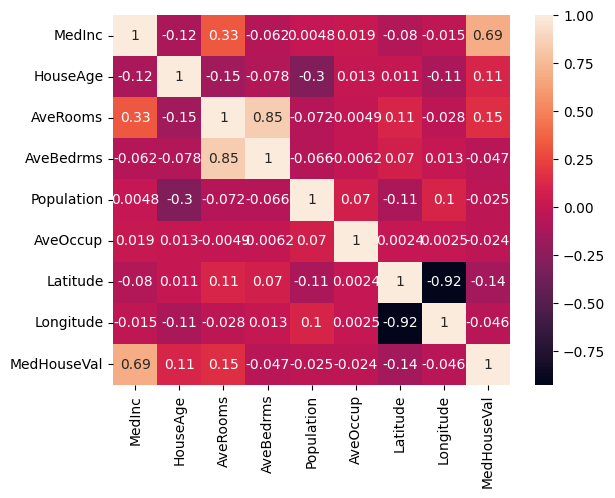

In [ ]:
# Draw the heatmap for both cases.

import pandas as pd
import seaborn as sns

df = pd.DataFrame(pearson_corr)

sns.heatmap(df, annot=True)


In [ ]:
spearman_corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.147308,0.643671,-0.252426,0.006268,-0.044171,-0.088029,-0.009928,0.676778
HouseAge,-0.147308,1.000000,-0.231409,-0.120981,-0.283879,-0.024833,0.032440,-0.150752,0.074855
AveRooms,0.643671,-0.231409,1.000000,0.082046,-0.105385,0.018807,0.127134,-0.044783,0.263367
AveBedrms,-0.252426,-0.120981,0.082046,1.000000,0.027027,-0.132315,0.047197,0.010884,-0.125187
Population,0.006268,-0.283879,-0.105385,0.027027,1.000000,0.242337,-0.123626,0.123527,0.003839
AveOccup,-0.044171,-0.024833,0.018807,-0.132315,0.242337,1.000000,-0.150954,0.181468,-0.256594
Latitude,-0.088029,0.032440,0.127134,0.047197,-0.123626,-0.150954,1.000000,-0.879203,-0.165739
Longitude,-0.009928,-0.150752,-0.044783,0.010884,0.123527,0.181468,-0.879203,1.000000,-0.069667
MedHouseVal,0.676778,0.074855,0.263367,-0.125187,0.003839,-0.256594,-0.165739,-0.069667,1.000000


from matplotlib import pyplot as plt
spearman_corr['MedInc'].plot(kind='hist', bins=20, title='MedInc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
spearman_corr['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
spearman_corr['AveRooms'].plot(kind='hist', bins=20, title='AveRooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
spearman_corr['AveBedrms'].plot(kind='hist', bins=20, title='AveBedrms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
spearman_corr.plot(kind='scatter', x='MedInc', y='HouseAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
spearman_corr.plot(kind='scatter', x='HouseAge', y='AveRooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
spearman_corr.plot(kind='scatter', x='AveRooms', y='AveBedrms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
spearman_corr.plot(kind='scatter', x='AveBedrms', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
spearman_corr['MedInc'].plot(kind='line', figsize=(8, 4), title='MedInc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
spearman_corr['HouseAge'].plot(kind='line', figsize=(8, 4), title='HouseAge')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
spearman_corr['AveRooms'].plot(kind='line', figsize=(8, 4), title='AveRooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
spearman_corr['AveBedrms'].plot(kind='line', figsize=(8, 4), title='AveBedrms')
plt.gca().spines[['top', 'right']].set_visible(False)

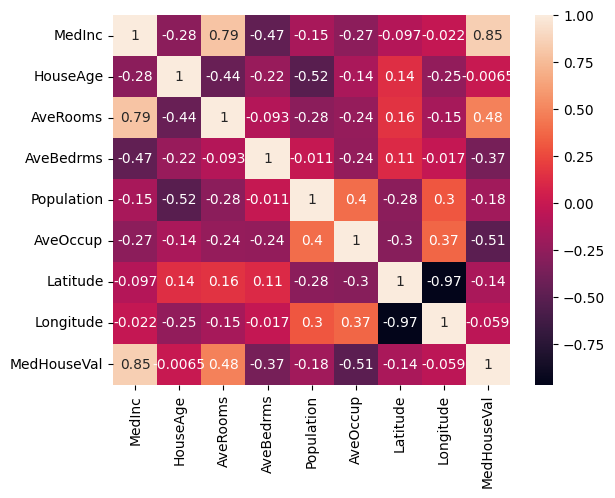

In [ ]:
# Draw the heatmap for both cases.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr = spearman_corr.corr()

sns.heatmap(corr, annot=True)
plt.show()
